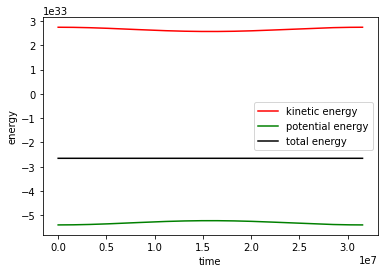

In [1]:
import numpy as np
import matplotlib.pyplot as plt
M=1.989*10**30
G=6.67408*10**(-11)
m=5.9722*10**(24)
h=3600 #should set
l=int(365*24*3600/h)
t=np.linspace(0,365*24*3600,l)
x=np.zeros(l)
y=np.zeros(l)
vx=np.zeros(l)
vy=np.zeros(l)
U=np.zeros(l) #potential energy
T=np.zeros(l) #kinetic energy
E=np.zeros(l)
#initial conditions
x[0]=0       
y[0]=1.4710*10**11
vx[0]=3.0287*10**(4)
vy[0]=0
T[0]=(1/2)*m*(vx[0]**2+vy[0]**2)
U[0]=-G*M*m/(np.sqrt(x[0]**2+y[0]**2))
E[0]=T[0]+U[0]
v1=vx[0]
v2=vy[0]
# verlet integration
for i in range(1,l):
  v1=v1+((h/2)*-G*M*x[i-1]/((np.sqrt(x[i-1]**2+y[i-1]**2))**3))
  x[i]=x[i-1]+h*(v1)
  v2=v2+(h/2)*-G*M*y[i-1]/((np.sqrt(x[i-1]**2+y[i-1]**2))**3)
  y[i]=y[i-1]+h*(v2)
  U[i]=-G*M*m/(np.sqrt(x[i]**2+y[i]**2))
  vx[i]=v1+(h/2)*-G*M*x[i]/((np.sqrt(x[i]**2+y[i]**2))**3)
  v1=vx[i]
  vy[i]=v2+(h/2)*-G*M*y[i]/((np.sqrt(x[i]**2+y[i]**2))**3)
  v2=vy[i]
  T[i]=(1/2)*m*(vx[i]**2+vy[i]**2)
  E[i]=T[i]+U[i]
plt.plot(t,T,color="red",label="kinetic energy")
plt.plot(t,U,color="green",label="potential energy")
plt.plot(t,E,color="black",label="total energy")
#print(E[4000])
plt.xlabel("time")
plt.ylabel("energy")
#plt.title("energy vs time")
plt.legend()
plt.savefig("tenb.png")
plt.show()